# This notebook explore the coorelation between TE up-regulation ( in SER / AD) and TE integration age
- to explore if the top-upregulated TEs are younger species
- 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import gc

In [3]:
from scipy import stats

## load data

In [15]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )

In [16]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv',
       'TCPS_all_Deseq_indiv_locus.csv', 'resampled_TCPS_all_TE_indi.csv',
       'TCPS_seq_similarity_summary_df.csv',
       'squire_tjp2_mut_seq_similarity_summary_df.csv',
       'squire_tjp2_wt_seq_similarity_summary_df.csv',
       'squire_tjp2_total_seq_similarity_summary_df.csv',
       'mouse_human_combined_similarity_suammry_df.csv',
       'squire_tjp2_total_seq_similarity_grouped_repClass_summary_df.csv',
       'TCPS_total_seq_similarity_grouped_repClass_summary_df.csv',
       'squire_all_Deseq_indiv_locus.csv', 'resampled_squire_all_TE_indi.csv',
       'squire_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv',
       'TCPS_total_seq_similarity_repClassGrped_rvcmp_summary_df.csv'],
      dtype='object')

In [18]:
print( logi['genoLoc_TCPS_Deseq_indiv_locus_result.csv'].loc['explain'] )

Derived from the TCPS Deseq individual locus result stored in Dropbox --> TCPS_TE_results --> TE_indi_deseq.tsv. Genome location information added based on the GTF file Sandy shared which can be found in Dropbox TCPS_TE_results/hg38_gencode_rmsk_indi. Updated in nb6 to include sequence length information


In [3]:
tcps_indiv = pd.read_csv("./genoLoc_TCPS_Deseq_indiv_locus_result.csv" , header = 0, index_col = 0 )

In [4]:
tcps_indiv.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-,145.0,2.001854
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+,143.0,2.238395
2992,LTR10A_6,7.215176,4.566861,1.173587,3.891371,0.000100,0.013165,chr1,26268832,26269405,+,573.0,4.566861
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,0.000198,0.022386,chr1,26554369,26554498,+,129.0,3.860287
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,0.000039,0.006472,chr1,27730174,27730485,-,311.0,3.134858


In [5]:
rmsk_df = pd.read_csv("/home/lucy/Dropbox/TCPS_TE_results/hg38_gencode_rmsk_indi.csv", header = 0, index_col= 0 )

In [6]:
rmsk_df.head()

,genoName,source,feature,genoStart,genoEnd,score,strand,frame,gene_id
0,chr1,hg38_rmsk,exon,67108754,67109046,1892.0,+,0,L1P5
1,chr1,hg38_rmsk,exon,8388316,8388618,2582.0,-,0,AluY
2,chr1,hg38_rmsk,exon,25165804,25166380,4085.0,+,0,L1MB5
3,chr1,hg38_rmsk,exon,33554186,33554483,2285.0,-,0,AluSc
4,chr1,hg38_rmsk,exon,41942895,41943205,2451.0,-,0,AluY_1


In [26]:
rmsk_df.shape

(5633664, 9)

In [28]:
rmsk_df['gene_id'].duplicated().sum()

0

In [8]:
test_TAACCC = rmsk_df[rmsk_df['gene_id'].str.startswith('(TAACCC)n')]
test_TAACCC2 = test_TAACCC[test_TAACCC['genoName'] == 'chr1' ]

In [9]:
test_TAACCC2.head()

,genoName,source,feature,genoStart,genoEnd,score,strand,frame,gene_id
944,chr1,hg38_rmsk,exon,10001,10468,463.0,+,0,(TAACCC)n
37708,chr1,hg38_rmsk,exon,18254434,18254491,16.0,+,0,(TAACCC)n_1


In [12]:
rmsk_df.columns = ['genoName', 'source', 'feature', 'genoStart', 'genoEnd', 'swScore',
       'strand', 'frame', 'gene_id']

In [21]:
original_tcps_indi = pd.read_csv("/home/lucy/Dropbox/TCPS_TE_results/TE_indi_deseq_zc.csv", header = 0, index_col = 0)

In [22]:
original_tcps_indi.shape

(172873, 10)

In [23]:
original_tcps_indi.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repName,repClass,repFamily
0,L2,0.097405,0.197787,1.457064,0.135744,0.892024,0.999991,L2,LINE,L2
1,AluSg,0.493240,1.038439,0.909837,1.141346,0.253726,0.999991,AluSg,SINE,Alu
2,L1PA8A,1.504698,-0.263127,0.834217,-0.315418,0.752444,0.999991,L1PA8A,LINE,L1
3,L1MDb,0.179092,0.166453,1.381934,0.120449,0.904127,0.999991,L1MDb,LINE,L1
4,AluSp,0.033562,0.514654,3.312685,0.155358,0.876539,0.999991,AluSp,SINE,Alu


In [25]:
#original_tcps_indi[original_tcps_indi['TE name'].str.startswith('ENS')]

In [27]:
original_tcps_indi['TE name'].duplicated().sum()

0

<Axes: >

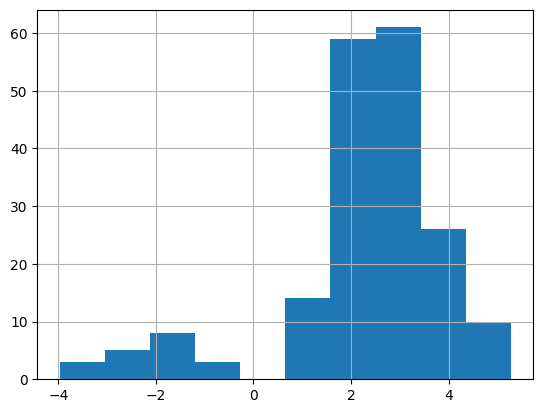

In [29]:
tcps_indiv['log2FoldChange'].hist()

In [36]:
original_tcps_indi[['repFamily', 'repClass']].value_counts()

repFamily  repClass  
Alu        SINE          75174
L1         LINE          30150
MIR        SINE          21793
L2         LINE          19852
ERVL-MaLR  LTR            9948
ERV1       LTR            5830
ERVL       LTR            3212
CR1        LINE           2226
SVA        Retroposon     1922
ERVK       LTR            1165
RTE-X      LINE            453
RTE-BovB   LINE            364
tRNA-RTE   SINE            235
Gypsy      LTR             214
tRNA       SINE            109
5S-Deu-L2  SINE             93
Penelope   LINE             59
LTR        LTR              42
tRNA-Deu   SINE             22
Dong-R4    LINE             10
Name: count, dtype: int64

## add swScore to deseq result

In [42]:
rmsk_df.set_index( 'gene_id', inplace= True)

In [44]:
rmsk_sig_subset = rmsk_df.loc[ tcps_indiv['TE name'], 'swScore' ]

In [45]:
rmsk_sig_subset.head()

gene_id
MIRb_2591     270.0
MIRb_3645     439.0
LTR10A_6     2888.0
MIR_2537      376.0
AluSp_907    2387.0
Name: swScore, dtype: float64

In [46]:
rmsk_sig_subset.shape

(189,)

In [48]:
tcps_indiv2 = pd.merge( left = tcps_indiv, right = rmsk_sig_subset, left_on='TE name', right_index= True )

In [49]:
tcps_indiv2

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC,-log(padj),swScore
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-,145.0,2.001854,2.092967,270.0
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+,143.0,2.238395,2.283760,439.0
2992,LTR10A_6,7.215176,4.566861,1.173587,3.891371,0.000100,0.013165,chr1,26268832,26269405,+,573.0,4.566861,1.880576,2888.0
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,0.000198,0.022386,chr1,26554369,26554498,+,129.0,3.860287,1.650017,376.0
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,0.000039,0.006472,chr1,27730174,27730485,-,311.0,3.134858,2.188970,2387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167306,L1MD1_6530,2.768887,3.023591,0.756108,3.998885,0.000064,0.009274,chr20,63889319,63889745,-,426.0,3.023591,2.032756,1133.0
168657,L1MDb_1091,7.592491,2.738102,0.648308,4.223458,0.000024,0.004383,chr21,42381383,42382036,+,653.0,2.738102,2.358247,1985.0
169005,AluJb_123543,2.045746,3.357228,0.970826,3.458117,0.000544,0.047680,chr21,46389802,46389873,+,71.0,3.357228,1.321660,434.0
169435,AluJb_123943,11.636410,1.595977,0.424677,3.758096,0.000171,0.019968,chr22,20518854,20519152,-,298.0,1.595977,1.699659,1868.0


## Association between SER-upregulation and swScore
- swScore: smith waterman alignment score. Higher alignment scores indicate greater similarity between the element and the reference / consensus TE
    + higher similarity score could indicates younger the integration age, because older sequences has more mutation and thus lower alignment rate

## try on significant TEs first
- too many elements for the full dTE table, slow mapping to swScore
- but too much loss of information if use significant TEs, so need to proceed with sub-sampled all TEs

In [13]:
tcps_indiv.head(2)

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-,145.0,2.001854
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+,143.0,2.238395


In [14]:
tcps_indiv.shape

(189, 13)

check if the stat is correlated with LFC and padj

In [37]:
tcps_indiv['-log(padj)'] = np.log10( tcps_indiv['padj']) * -1

<Axes: xlabel='log2FoldChange', ylabel='-log(padj)'>

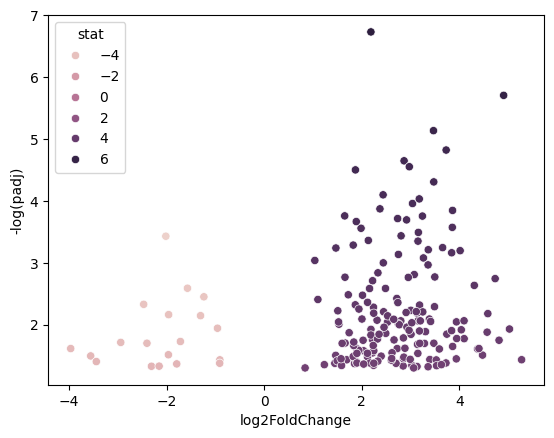

In [38]:
sn.scatterplot( data = tcps_indiv, x = 'log2FoldChange', y = '-log(padj)', hue= 'stat' )

<Axes: xlabel='stat', ylabel='swScore'>

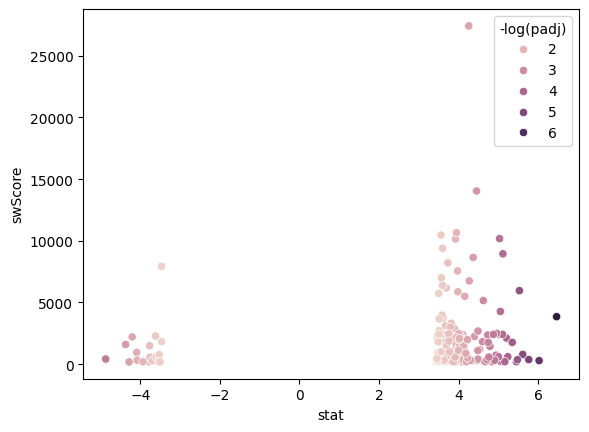

In [51]:
sn.scatterplot( data = tcps_indiv2, x = 'stat', y = 'swScore', hue = '-log(padj)' )

## Try on all TEs but subsampled

### sub-sample the all deseq df but includes all significant TEs

In [52]:
subsampled_original_tcps = original_tcps_indi.sample( frac= 0.5,  )

In [53]:
subsampled_original_tcps.shape

(86436, 10)

In [56]:
subsampled_original_tcps.columns

Index(['TE name', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'repName', 'repClass', 'repFamily'],
      dtype='object')

In [57]:
tcps_indiv.columns

Index(['TE name', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'genoName', 'genoStart', 'genoEnd', 'strand', 'seqLen',
       'absolute_LFC', '-log(padj)'],
      dtype='object')

In [59]:
to_add_sig_name = tcps_indiv['TE name'][ ~ np.isin( tcps_indiv['TE name'] , subsampled_original_tcps['TE name'] ) ]

In [60]:
to_add_sig_df = original_tcps_indi[ np.isin( original_tcps_indi['TE name'], to_add_sig_name) ]

In [61]:
to_add_sig_df

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repName,repClass,repFamily
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,5.250000e-05,0.008073,MIRb,SINE,MIR
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,1.983860e-04,0.022386,MIR,SINE,MIR
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,3.950000e-05,0.006472,AluSp,SINE,Alu
6582,L2b_3755,2.860923,4.731285,1.057905,4.472316,7.740000e-06,0.001795,L2b,LINE,L2
9538,MIRb_14297,5.389823,2.435223,0.464821,5.239053,1.610000e-07,0.000079,MIRb,SINE,MIR
...,...,...,...,...,...,...,...,...,...,...
161913,AluJb_118378,4.707088,1.834742,0.486198,3.773654,1.608740e-04,0.019022,AluJb,SINE,Alu
162518,AluSp_47503,5.967361,2.244849,0.639888,3.508191,4.511650e-04,0.041836,AluSp,SINE,Alu
166956,L1MA9_15822,2.767355,3.494699,0.778274,4.490318,7.110000e-06,0.001688,L1MA9,LINE,L1
169435,AluJb_123943,11.636410,1.595977,0.424677,3.758096,1.712110e-04,0.019968,AluJb,SINE,Alu


In [62]:
subsampled_original_tcps = pd.concat( [ subsampled_original_tcps, to_add_sig_df ] , axis = 0 )

In [63]:
subsampled_original_tcps.shape

(86522, 10)

### add swScore

In [64]:
found_scores = rmsk_df['swScore'].loc[ subsampled_original_tcps['TE name'] ]

In [65]:
len( found_scores)

86522

In [66]:
subsampled_original_tcps0 = subsampled_original_tcps.copy() # save a copy

In [67]:
subsampled_original_tcps = pd.merge( left = subsampled_original_tcps, right = found_scores, left_on='TE name', right_index= True )

In [68]:
subsampled_original_tcps.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repName,repClass,repFamily,swScore
68562,AluSx_43647,0.689040,-0.499045,1.532867,-0.325563,0.744755,0.999991,AluSx,SINE,Alu,2219.0
1238,SVA_D_18,0.064364,0.370660,4.537969,0.081680,0.934901,0.999991,SVA_D,Retroposon,SVA,6994.0
103177,L2a_110606,0.036088,0.546634,4.538151,0.120453,0.904124,0.999991,L2a,LINE,L2,1940.0
20506,L2c_18911,0.081613,0.520110,4.538122,0.114609,0.908755,0.999991,L2c,LINE,L2,192.0
149788,AluY_91318,0.203635,1.219944,1.046409,1.165839,0.243679,0.999991,AluY,SINE,Alu,1620.0


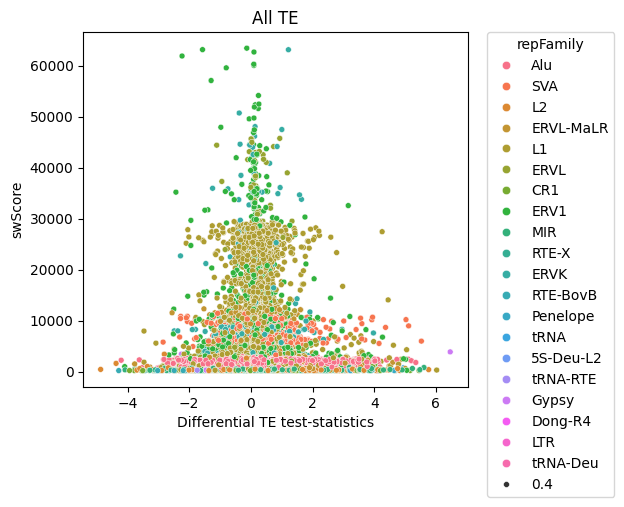

In [53]:
f,a = plt.subplots()
sn.scatterplot( data = subsampled_original_tcps, x = 'stat', y = 'swScore', hue = 'repFamily' , size = 0.4, ax = a )
plt.legend( title = 'repFamily',
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.title( 'All TE')
plt.xlabel('Differential TE test-statistics') 

# Show the plot
plt.show()

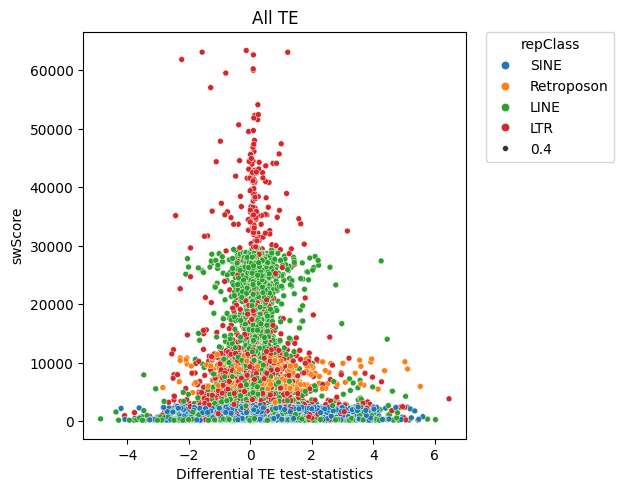

In [6]:
f,a = plt.subplots()
sn.scatterplot( data = subsampled_original_tcps, x = 'stat', y = 'swScore', hue = 'repClass' , size = 0.4, ax = a )
plt.legend( title = 'repClass',
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.title( 'All TE')
plt.xlabel('Differential TE test-statistics') 

# Show the plot
plt.show()

<Axes: >

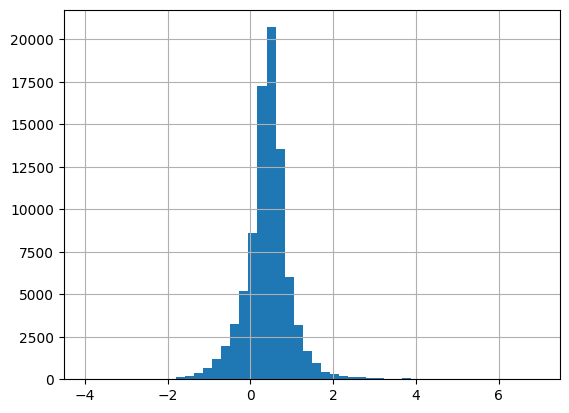

In [74]:
subsampled_original_tcps['log2FoldChange'].hist( bins = 50, )

plot based on different repClass

In [35]:
unique_classes = subsampled_original_tcps['repClass'].unique()

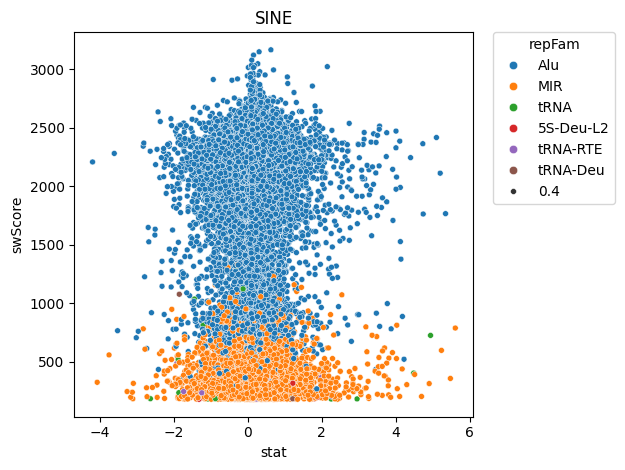

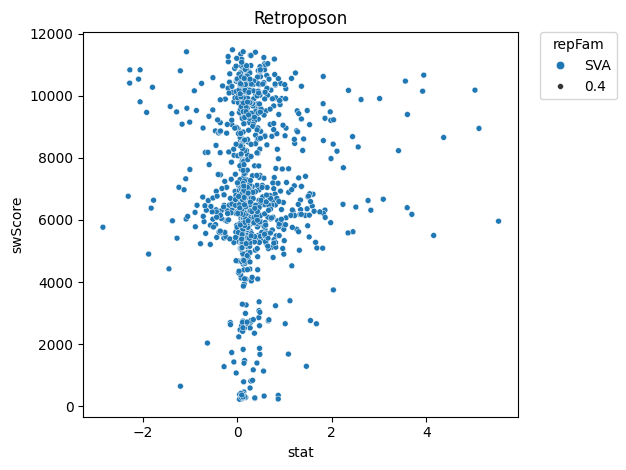

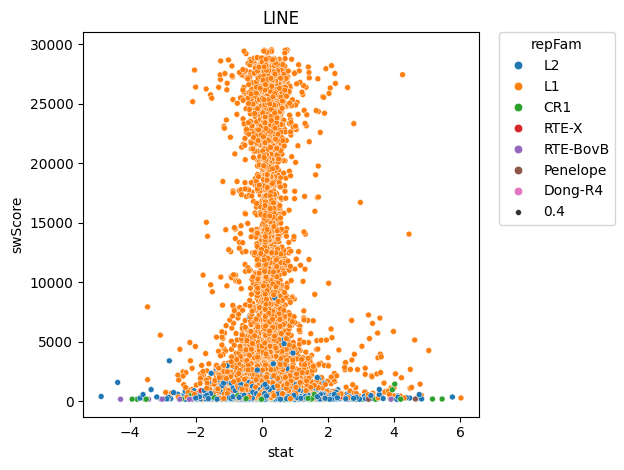

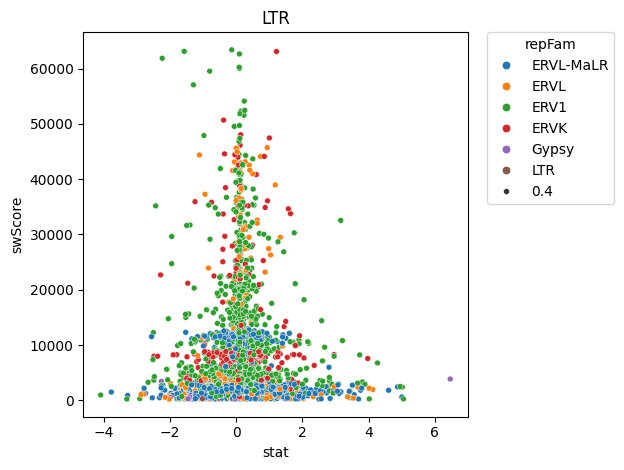

In [62]:
for c in unique_classes:
    plot_df = subsampled_original_tcps[ subsampled_original_tcps['repClass'] == c ]
    
    f,a = plt.subplots()
    sn.scatterplot( data = plot_df, x = 'stat', y = 'swScore', hue = 'repFamily' , size = 0.4, ax = a )
    plt.legend( title = 'repFam',
        bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
        loc='upper left',
        borderaxespad=0
    )
    
    # Adjust layout to make room for the legend
    plt.title( c )
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f"TE_age_plots/scatter_{c}.png")
    plt.show()

#TODO: 
- first, get only LTR, threshold based with |stat| > 2, then compare with barplot and t-test
- then repeat with all classes

## barplots and violin plots with high LFC TEs

In [4]:
subsampled_original_tcps = pd.read_csv("A1_subsampled_orig_dTE_df.csv", header = 0, index_col = 0 )

In [5]:
subsampled_original_tcps.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repName,repClass,repFamily,swScore
68562,AluSx_43647,0.689040,-0.499045,1.532867,-0.325563,0.744755,0.999991,AluSx,SINE,Alu,2219.0
1238,SVA_D_18,0.064364,0.370660,4.537969,0.081680,0.934901,0.999991,SVA_D,Retroposon,SVA,6994.0
103177,L2a_110606,0.036088,0.546634,4.538151,0.120453,0.904124,0.999991,L2a,LINE,L2,1940.0
20506,L2c_18911,0.081613,0.520110,4.538122,0.114609,0.908755,0.999991,L2c,LINE,L2,192.0
149788,AluY_91318,0.203635,1.219944,1.046409,1.165839,0.243679,0.999991,AluY,SINE,Alu,1620.0


### get high LFC subset of TEs

In [4]:
high_LFC_df = subsampled_original_tcps[ (subsampled_original_tcps['log2FoldChange'] > 2) | (subsampled_original_tcps['log2FoldChange'] < -2) ] 

In [8]:
high_LFC_df.shape

(1040, 11)

make up and down regulated labels

In [5]:
up_down_label = [ ('UP' if high_LFC_df.loc[i, 'log2FoldChange'] > 0 else 'DOWN') for i in high_LFC_df.index ]

In [6]:
high_LFC_df['fold_change_label'] = up_down_label

/tmp/ipykernel_666211/2563409238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_LFC_df['fold_change_label'] = up_down_label


In [1]:
high_LFC_df.head()

NameError: name 'high_LFC_df' is not defined

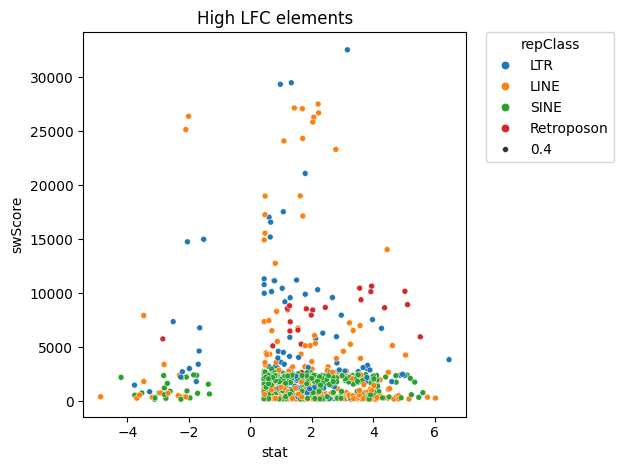

In [61]:
f,a = plt.subplots()
sn.scatterplot( data = high_LFC_df, x = 'stat', y = 'swScore', hue = 'repClass' , size = 0.4, ax = a )
plt.legend( title = 'repClass',
    bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    loc='upper left',
    borderaxespad=0
)

# Adjust layout to make room for the legend
plt.title( 'High LFC elements' )

plt.tight_layout()

# Show the plot
plt.savefig(f"TE_age_plots/scatter_highLFC_all.png")
plt.show()

### violin plots comparing up and down regulated groups

In [8]:
import matplotlib as mpl

In [9]:
colors = mpl.colormaps['Set2'].colors

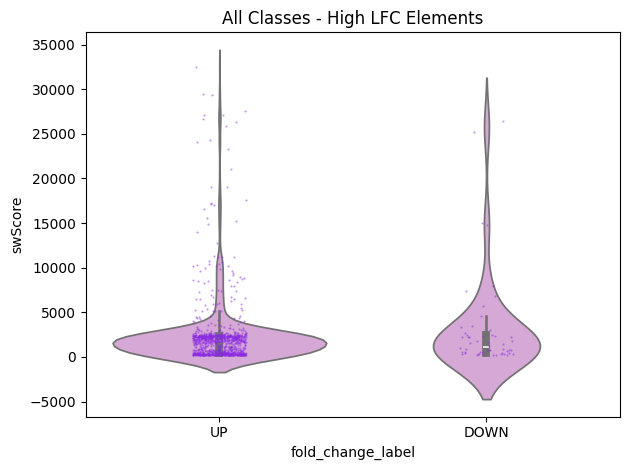

In [59]:
f,a = plt.subplots()

sn.violinplot( data = high_LFC_df, x = 'fold_change_label', y = 'swScore', ax = a, color = 'plum' )
sn.stripplot( data = high_LFC_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.5, color = 'blueviolet', alpha = 0.5 )

# plt.legend( title = 'repClass',
#     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
#     loc='upper left',
#     borderaxespad=0
# )

# Adjust layout to make room for the legend
plt.title( 'All Classes - High LFC Elements' )
plt.tight_layout()

# Show the plot
plt.savefig(f"TE_age_plots/violin_highLFC_all.png")
plt.show()

In [50]:
# performing t test for the two group
s1 = high_LFC_df[ high_LFC_df[ 'fold_change_label'] == 'UP']['swScore']
s2 = high_LFC_df[ high_LFC_df[ 'fold_change_label'] == 'DOWN']['swScore']

t_statistic, p_value = stats.ttest_ind(s1, s2)

c = 'All TEs'
print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")

All TEs: SER UP vs AD up: p = 0.1483169218591728, t-stat = -1.4465784381422986


### barplots comparing up and down regulated groups

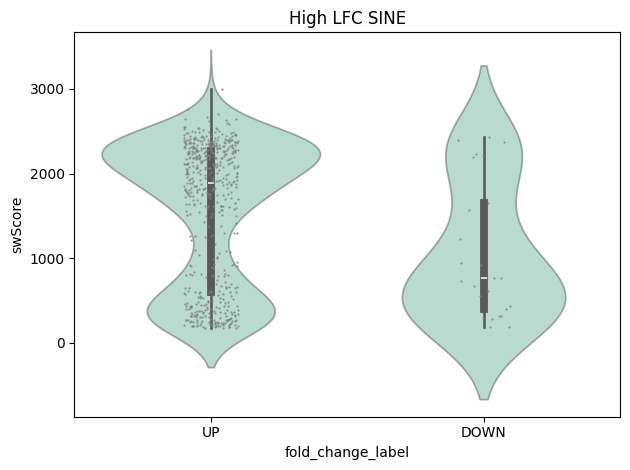

SINE: SER UP vs AD up: p = 0.003753559889828514, t-stat = 2.9094972376620323


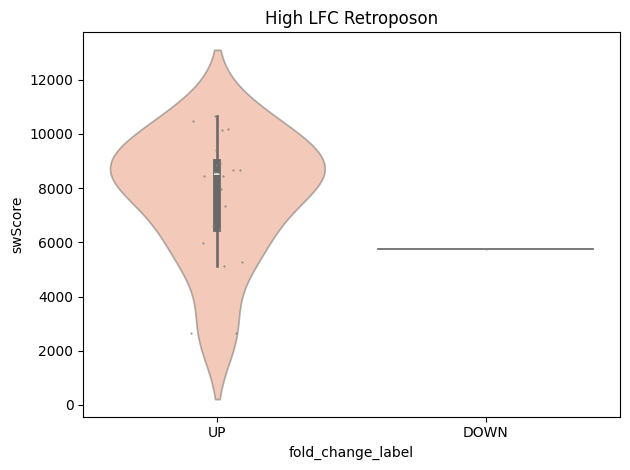

/tmp/ipykernel_593280/140660382.py:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(s1, s2)
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/lucy/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Retroposon: SER UP vs AD up: p = nan, t-stat = nan


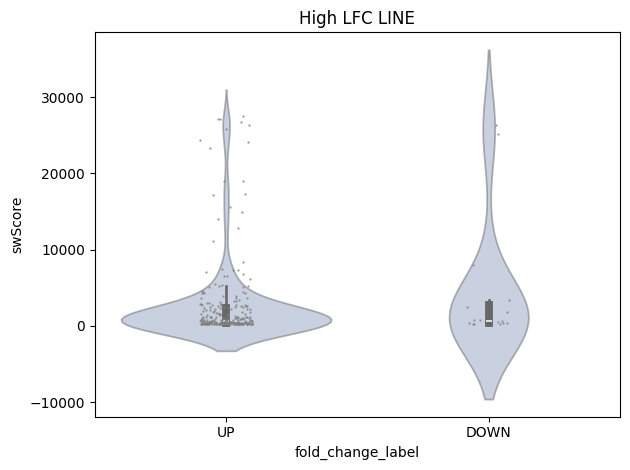

LINE: SER UP vs AD up: p = 0.19360766570975224, t-stat = -1.303077085453997


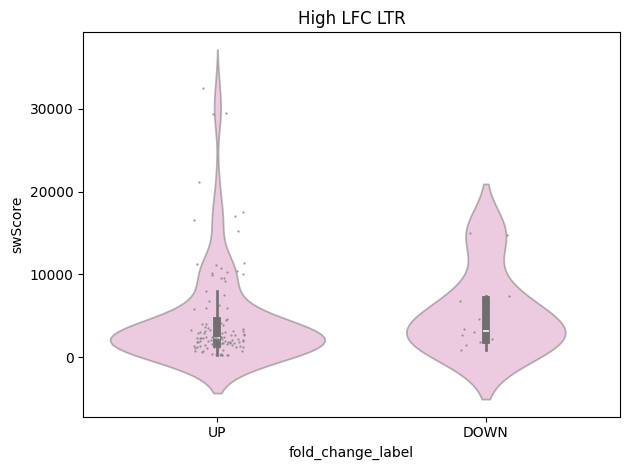

LTR: SER UP vs AD up: p = 0.6711102001279554, t-stat = -0.4256288953874116


In [60]:
i = 0
for c in unique_classes:
    plot_df = high_LFC_df[ high_LFC_df['repClass'] == c ]
    
    f,a = plt.subplots()

    sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.stripplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.6, color = 'grey', alpha = 0.8 )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.title( 'High LFC ' + c )
    
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"TE_age_plots/violin_highLFC_{c}.png")
    plt.show()
    i+=1 # iterate colors

    # performing t-test
    s1 = plot_df[ plot_df[ 'fold_change_label'] == 'UP']['swScore']
    s2 = plot_df[ plot_df[ 'fold_change_label'] == 'DOWN']['swScore']
    
    t_statistic, p_value = stats.ttest_ind(s1, s2)
    
    print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")
    

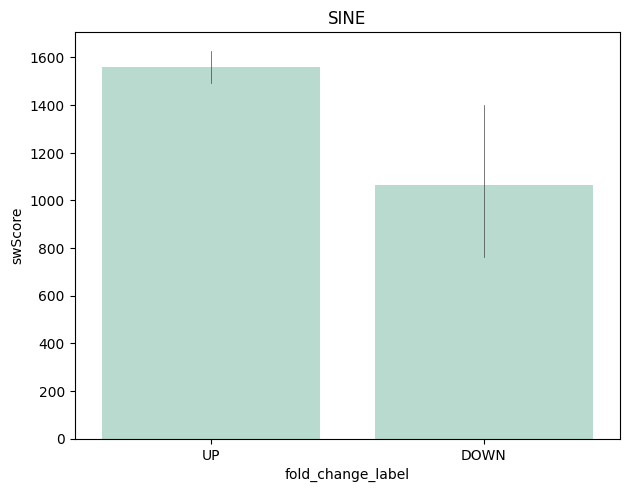

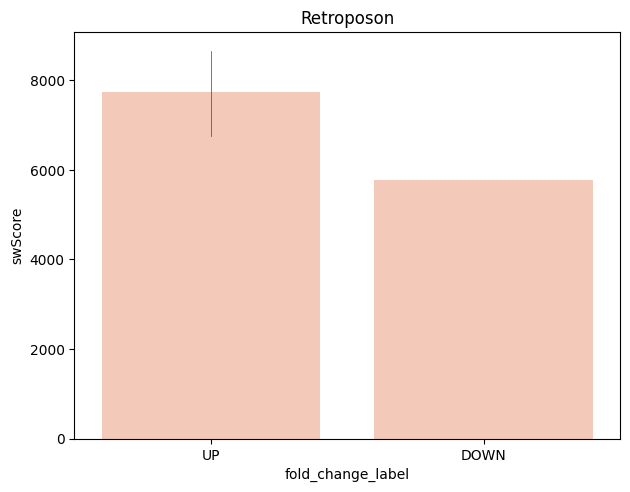

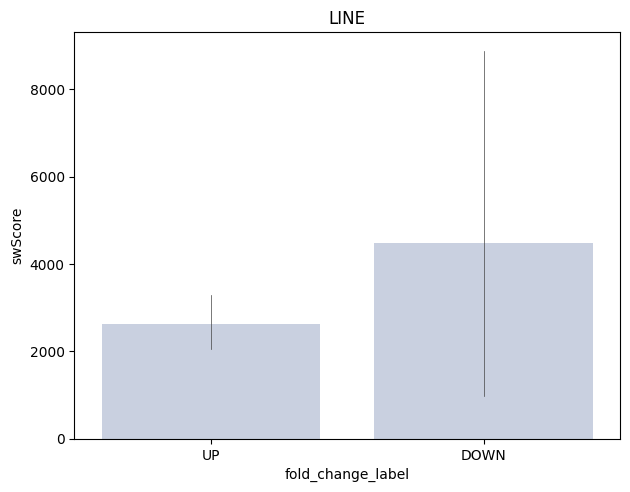

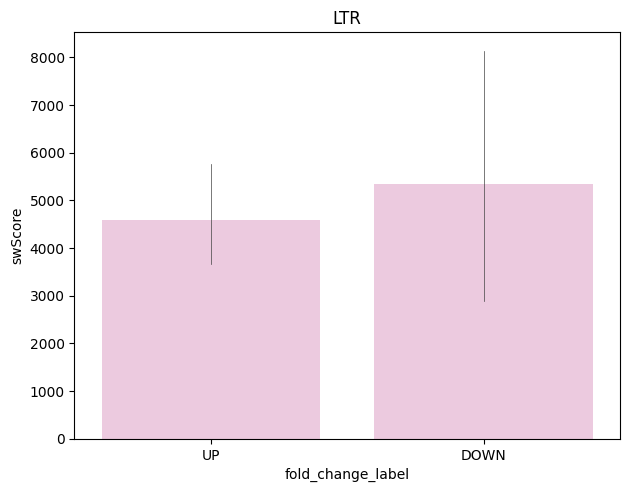

In [43]:
## Barplots visualization

i = 0
for c in unique_classes:
    plot_df = high_LFC_df[ high_LFC_df['repClass'] == c ]
    
    f,a = plt.subplots()

    #sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.barplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5, errwidth= 0. )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.title( c )
    
    # Show the plot
    plt.show()
    i+=1 # iterate colors
    

### look into LTR: check age difference between different ERV repFamilies

In [13]:
LTR_subdf = high_LFC_df[high_LFC_df['repClass'] == 'LTR' ]

In [14]:
unique_families = LTR_subdf['repFamily'].unique()

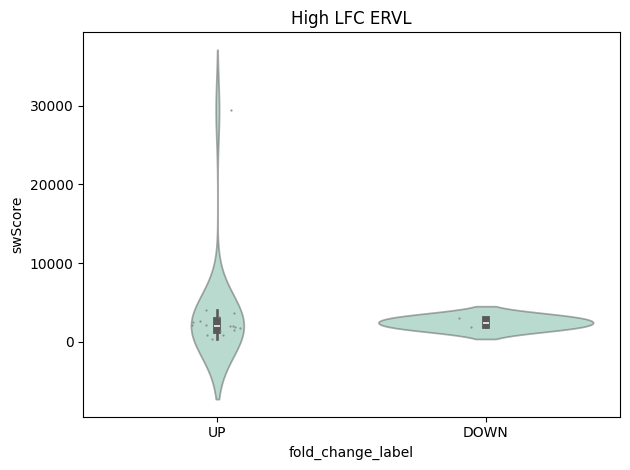

ERVL: SER UP vs AD up: p = 0.806431946834437, t-stat = 0.24888468572684078


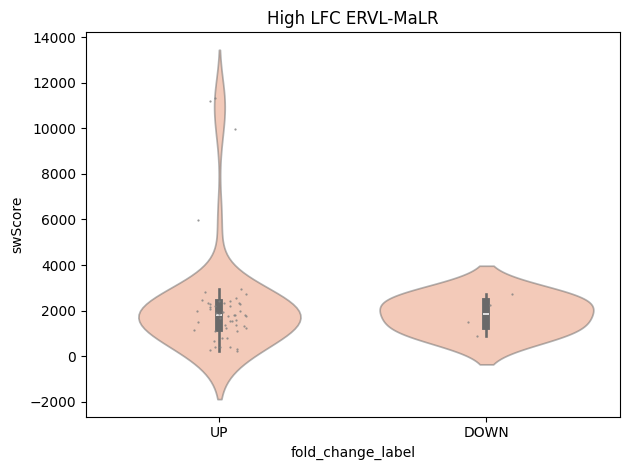

ERVL-MaLR: SER UP vs AD up: p = 0.7202067976486521, t-stat = 0.36005991907307844


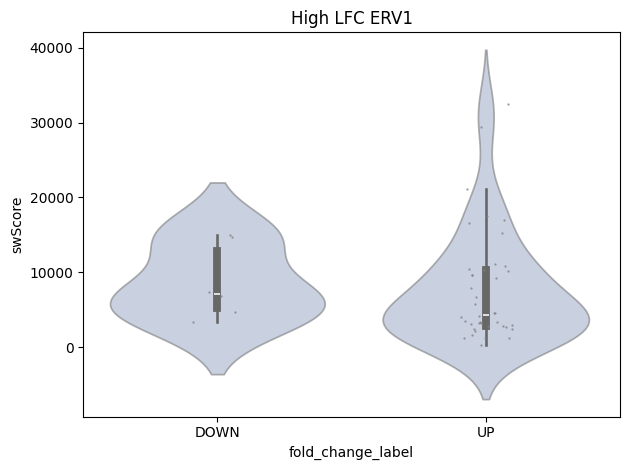

ERV1: SER UP vs AD up: p = 0.7907723935024189, t-stat = -0.2669271008927921


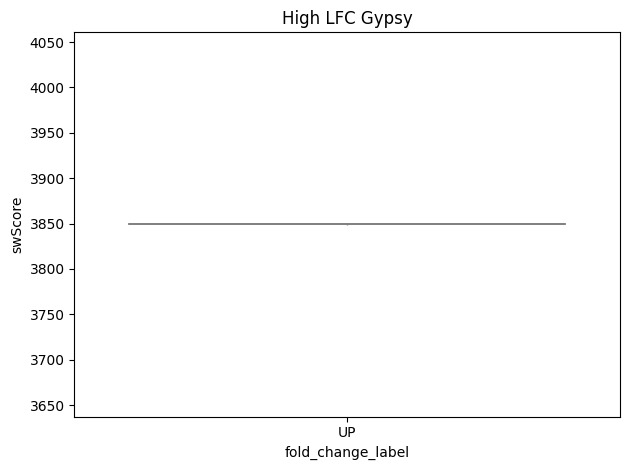

Gypsy: SER UP vs AD up: p = nan, t-stat = nan


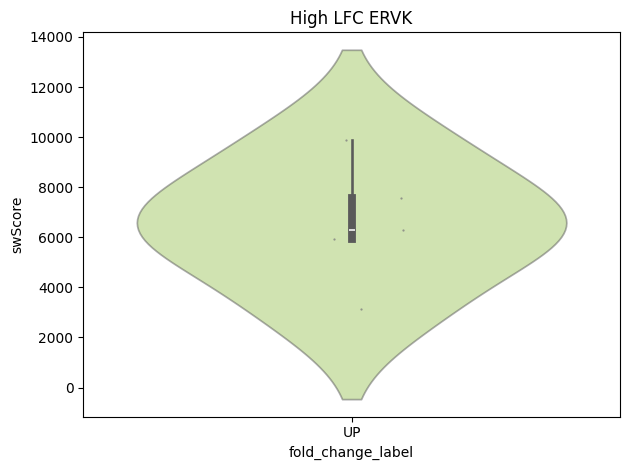

ERVK: SER UP vs AD up: p = nan, t-stat = nan


In [16]:
i = 0
for c in unique_families:
    plot_df = LTR_subdf[ LTR_subdf['repFamily'] == c ]
    
    f,a = plt.subplots()

    sn.violinplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, color = colors[i], alpha = 0.5)
    sn.stripplot( data = plot_df, x = 'fold_change_label', y = 'swScore', ax = a, size = 1.6, color = 'grey', alpha = 0.8 )
    
    # plt.legend( title = 'repClass',
    #     bbox_to_anchor=(1.05, 1),  # x=1.05 pushes it to the right
    #     loc='upper left',
    #     borderaxespad=0
    # )
    
    # Adjust layout to make room for the legend
    plt.title( 'High LFC ' + c )
    
    plt.tight_layout()
    # Show the plot
    plt.savefig(f"TE_age_plots/violin_highLFC_LTR_{c}.png")
    plt.show()
    i+=1 # iterate colors

    # performing t-test
    s1 = plot_df[ plot_df[ 'fold_change_label'] == 'UP']['swScore']
    s2 = plot_df[ plot_df[ 'fold_change_label'] == 'DOWN']['swScore']
    
    t_statistic, p_value = stats.ttest_ind(s1, s2)
    
    print( f"{c}: SER UP vs AD up: p = {p_value}, t-stat = {t_statistic}")
    

## save data

In [84]:
subsampled_original_tcps.to_csv("A1_subsampled_orig_dTE_df.csv", header = True, index = True )